In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('dataset_2017_2020.csv')

In [4]:
data

,customer_id,product_id,basket_id,loyalty,household_type,age_band,department,brand,commodity,store,transaction_date,price,days_since_first
0,15803,1131974,57266,Loyalist,1 adult with kids,19-24,Grocery,private,Baked bread/buns/rolls,374,2018-10-18 00:00:00,0.99,0
1,15803,1051516,57266,Loyalist,1 adult with kids,19-24,Produce,national,Vegetables - all others,374,2018-10-18 00:00:00,0.70,0
2,15803,967254,57266,Loyalist,1 adult with kids,19-24,Pharmaceutical,national,Cold and flu,374,2018-10-18 00:00:00,1.68,0
3,15803,1134222,57266,Loyalist,1 adult with kids,19-24,Grocery,private,Paper housewares,374,2018-10-18 00:00:00,2.59,0
4,15803,1003421,57266,Loyalist,1 adult with kids,19-24,Grocery,national,Soup,374,2018-10-18 00:00:00,0.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77745,36987,860776,80984,Promiscuous,2 adults with kids,45-54,Produce,national,Vegetables - all others,374,2018-07-19 00:00:00,0.79,0
77746,36987,1060673,80984,Promiscuous,2 adults with kids,45-54,Meat,national,Lunch meat,374,2018-07-19 00:00:00,3.00,0
77747,36987,973374,80984,Promiscuous,2 adults with kids,45-54,Produce,private,Onions,374,2018-07-19 00:00:00,1.99,0
77748,36987,13506200,80984,Promiscuous,2 adults with kids,45-54,Meat,national,Beef,374,2018-07-19 00:00:00,4.92,0


In [5]:
data['transaction_date'] = pd.to_datetime(data['transaction_date'])

In [6]:
data.shape

(77750, 13)

In [7]:
data.sort_values(by=['transaction_date'])

,customer_id,product_id,basket_id,loyalty,household_type,age_band,department,brand,commodity,store,transaction_date,price,days_since_first
39117,23472,1048299,65472,Promiscuous,2 adults with no kids,25-34,Grocery,national,Canned juices,374,2017-01-19,3.19,0
67548,28822,1015731,65443,Loyalist,1 adult with kids,19-24,Meat,national,Lunch meat,374,2017-01-19,2.59,0
67549,28822,948650,65443,Loyalist,1 adult with kids,19-24,Meat,national,Beef,374,2017-01-19,9.07,0
67550,28822,901062,65443,Loyalist,1 adult with kids,19-24,Produce,national,Apples,374,2017-01-19,3.82,0
28620,22010,15925394,65492,Promiscuous,Single male,19-24,Pharmaceutical,national,Candy,374,2017-01-19,1.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38230,23268,1116821,75424,Loyalist,2 adults with kids,19-24,Produce,national,Mushrooms,374,2020-05-19,1.99,0
38231,23268,863447,75424,Loyalist,2 adults with kids,19-24,Meat,national,Beef,374,2020-05-19,17.94,0
38232,23268,1125244,75424,Loyalist,2 adults with kids,19-24,Cosmetics,national,Bath,374,2020-05-19,2.98,0
38234,23268,878996,75424,Loyalist,2 adults with kids,19-24,Produce,national,Grapes,374,2020-05-19,9.35,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77750 entries, 0 to 77749
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       77750 non-null  int64         
 1   product_id        77750 non-null  int64         
 2   basket_id         77750 non-null  int64         
 3   loyalty           77750 non-null  object        
 4   household_type    77750 non-null  object        
 5   age_band          77750 non-null  object        
 6   department        77750 non-null  object        
 7   brand             77750 non-null  object        
 8   commodity         77750 non-null  object        
 9   store             77750 non-null  int64         
 10  transaction_date  77750 non-null  datetime64[ns]
 11  price             77750 non-null  float64       
 12  days_since_first  77750 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 7.7+ MB


In [9]:
data.describe()

,customer_id,product_id,basket_id,store,price,days_since_first
count,7.775000e+04,7.775000e+04,7.775000e+04,77750.0,77750.000000,77750.000000
mean,2.425159e+04,3.579019e+06,6.905152e+04,374.0,3.231060,33.144180
std,3.965495e+04,4.714247e+06,1.055748e+05,0.0,3.280044,43.876355
min,1.580300e+04,3.508200e+04,5.196400e+04,374.0,0.100000,0.000000
25%,1.952900e+04,9.200910e+05,5.987200e+04,374.0,1.490000,0.000000
50%,2.342900e+04,1.037863e+06,6.802100e+04,374.0,2.500000,6.000000
75%,2.699300e+04,5.578437e+06,7.521500e+04,374.0,3.990000,62.000000
max,2.811700e+06,1.820392e+07,6.811600e+06,374.0,68.970000,176.000000


In [10]:
data.isnull().sum()

customer_id         0
product_id          0
basket_id           0
loyalty             0
household_type      0
age_band            0
department          0
brand               0
commodity           0
store               0
transaction_date    0
price               0
days_since_first    0
dtype: int64

In [11]:
data['day'] = (data['transaction_date']).dt.day
data['month'] = (data['transaction_date']).dt.month
data['year'] = (data['transaction_date']).dt.year

In [12]:
## numerical features
numerical_feature = [feature for feature in data.columns if data[feature].dtypes != 'O']

In [13]:
numerical_feature

['customer_id',
 'product_id',
 'basket_id',
 'store',
 'transaction_date',
 'price',
 'days_since_first',
 'day',
 'month',
 'year']

In [14]:
discrete_feature = [feature for feature in numerical_feature if len(data[feature].unique()) < 25]

In [15]:
discrete_feature

['store', 'day', 'month', 'year']

In [16]:
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]

In [17]:
continuous_feature

['customer_id',
 'product_id',
 'basket_id',
 'transaction_date',
 'price',
 'days_since_first']

In [18]:
categorical_feature = [feature for feature in data.columns if data[feature].dtypes == 'O']

In [19]:
categorical_feature

['loyalty', 'household_type', 'age_band', 'department', 'brand', 'commodity']

In [20]:
for feature in categorical_feature:
    print("Features is {} and categories are {}".format(feature, len(data[feature].unique()))) 

Features is loyalty and categories are 3
Features is household_type and categories are 5
Features is age_band and categories are 6
Features is department and categories are 11
Features is brand and categories are 2
Features is commodity and categories are 247


In [21]:
for feature in categorical_feature:
    print("Features is {} and categories are {}".format(feature, data[feature].unique()))

Features is loyalty and categories are ['Loyalist' 'Promiscuous' 'First Time Buyer']
Features is household_type and categories are ['1 adult with kids' 'Single female' '2 adults with no kids'
 '2 adults with kids' 'Single male']
Features is age_band and categories are ['19-24' '25-34' '35-44' '45-54' 'Greater than 65' '55-64']
Features is department and categories are ['Grocery' 'Produce' 'Pharmaceutical' 'Meat' 'Nutrition' 'Deli' 'Seafood'
 'Pastry' 'Cosmetics' 'Salad Bar' 'Floral']
Features is brand and categories are ['private' 'national']
Features is commodity and categories are ['Baked bread/buns/rolls' 'Vegetables - all others' 'Cold and flu'
 'Paper housewares' 'Soup' 'Frozen pizza' 'Tropical fruit' 'Heat/serve'
 'Prepared food' 'Deli meats' 'Apples' 'Hot dogs' 'Berries' 'Lunch meat'
 'Seafood-frozen' 'Beef' 'Breakfast sausage/sandwiches' 'Potatoes' 'Bread'
 'Water - carbonated/flavoured drinks' 'Candy' 'Makeup and treatment'
 'Dishwash detergents' 'Soft drinks' 'Milk by-product

In [22]:
## Descriptive analysis
## mean

data[['customer_id',
 'product_id',
 'basket_id',
 'store',
 'price',
 'days_since_first']].mean()

customer_id         2.425159e+04
product_id          3.579019e+06
basket_id           6.905152e+04
store               3.740000e+02
price               3.231060e+00
days_since_first    3.314418e+01
dtype: float64

In [23]:
data[['customer_id',
 'product_id',
 'basket_id',
 'store',
 'price',
 'days_since_first']].median()

customer_id           23429.0
product_id          1037863.0
basket_id             68021.0
store                   374.0
price                     2.5
days_since_first          6.0
dtype: float64

In [24]:
data[['customer_id',
 'product_id',
 'basket_id',
 'store',
 'price',
 'days_since_first']].mode()

,customer_id,product_id,basket_id,store,price,days_since_first
0,22255,1082185,75242,374,1.0,0


In [25]:
data[['customer_id',
 'product_id',
 'basket_id',
 'store',
 'price',
 'days_since_first']].std()

customer_id         3.965495e+04
product_id          4.714247e+06
basket_id           1.055748e+05
store               0.000000e+00
price               3.280044e+00
days_since_first    4.387636e+01
dtype: float64

In [26]:
data[['customer_id',
 'product_id',
 'basket_id',
 'store',
 'price',
 'days_since_first']].var()

customer_id         1.572515e+09
product_id          2.222412e+13
basket_id           1.114603e+10
store               0.000000e+00
price               1.075869e+01
days_since_first    1.925135e+03
dtype: float64

In [27]:
data[['customer_id',
 'product_id',
 'basket_id',
 'store',
 'price',
 'days_since_first']].skew()

customer_id         63.042821
product_id           1.529197
basket_id           63.280144
store                0.000000
price                5.079476
days_since_first     1.145099
dtype: float64

## checking for missing values

<AxesSubplot:>

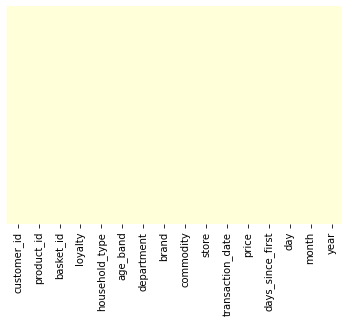

In [28]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

### The dataset has no missing values

In [29]:
data['loyalty'].value_counts()

Promiscuous         44943
Loyalist            31673
First Time Buyer     1134
Name: loyalty, dtype: int64

In [30]:
data['age_band'].value_counts()

19-24              39658
45-54              20077
25-34              12897
35-44               4833
Greater than 65      147
55-64                138
Name: age_band, dtype: int64

In [31]:
data.groupby('loyalty')['age_band'].value_counts()

loyalty           age_band       
First Time Buyer  19-24                643
                  25-34                290
                  35-44                135
                  45-54                 65
                  55-64                  1
Loyalist          19-24              19006
                  25-34               6982
                  35-44               4403
                  45-54               1196
                  Greater than 65       54
                  55-64                 32
Promiscuous       19-24              20009
                  45-54              18816
                  25-34               5625
                  35-44                295
                  55-64                105
                  Greater than 65       93
Name: age_band, dtype: int64

In [32]:
data['department'].value_counts()

Grocery           25516
Produce           16184
Pharmaceutical    11646
Meat              10867
Pastry             4648
Deli               3638
Nutrition          2472
Seafood            1494
Salad Bar           484
Cosmetics           456
Floral              345
Name: department, dtype: int64

In [33]:
data['brand'].value_counts()

national    59884
private     17866
Name: brand, dtype: int64

In [34]:
data['day'].value_counts()

19    49283
18    28467
Name: day, dtype: int64

## Univariate analysis

### continuous features

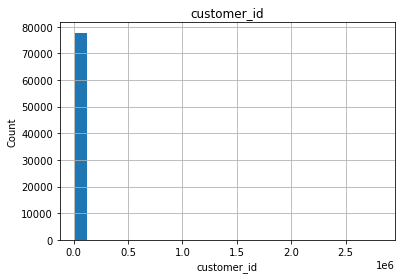

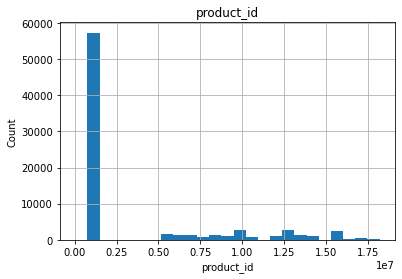

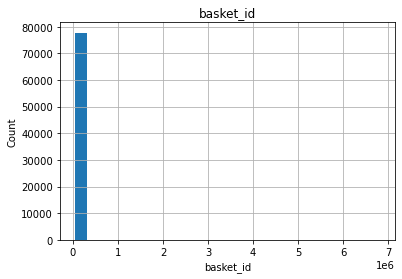

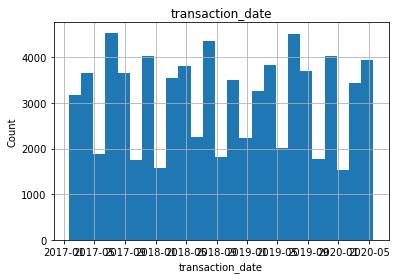

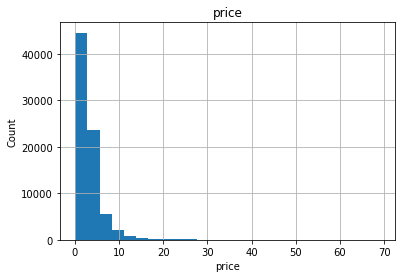

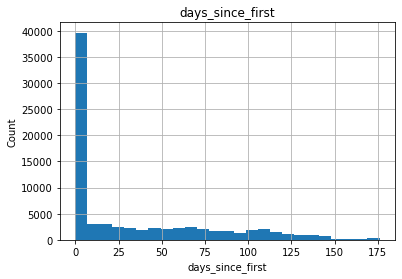

In [35]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    dataset=data.copy()
    dataset[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### discrete features

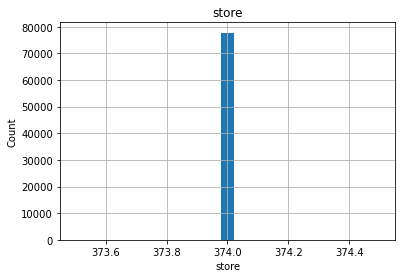

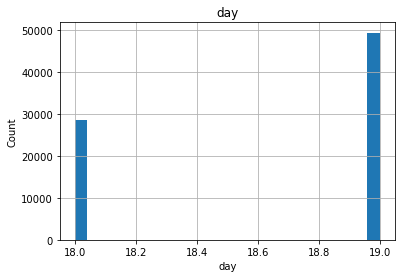

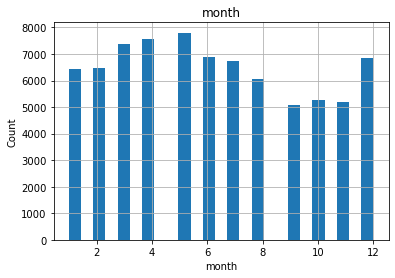

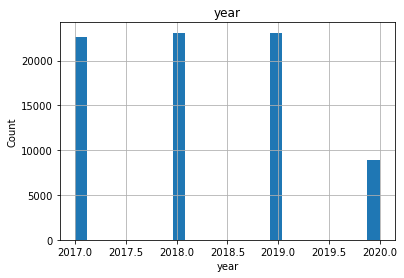

In [36]:
for feature in discrete_feature:
    dataset=data.copy()
    dataset[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### categorical features

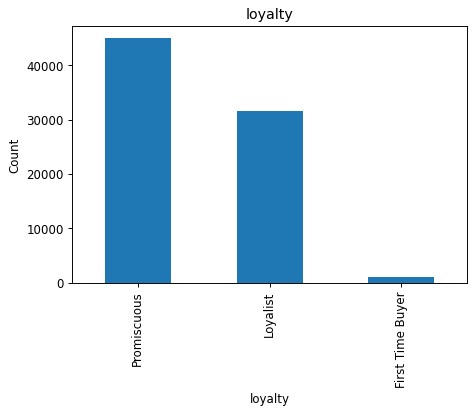

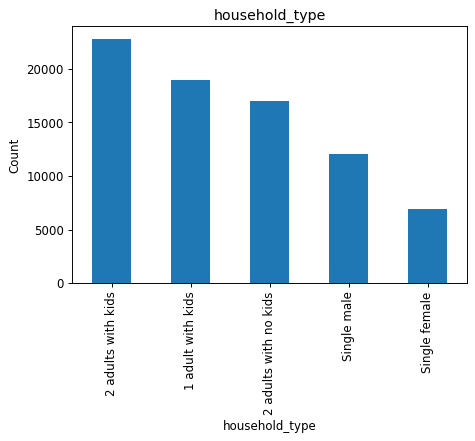

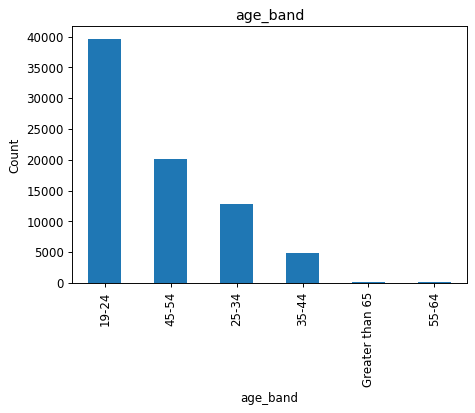

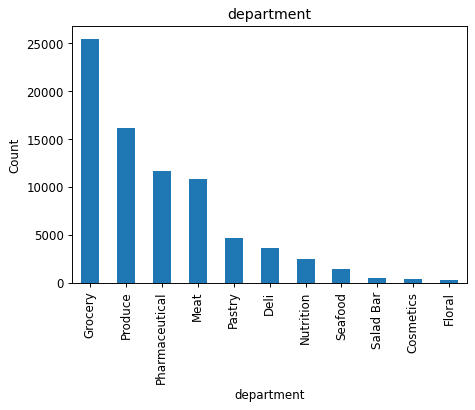

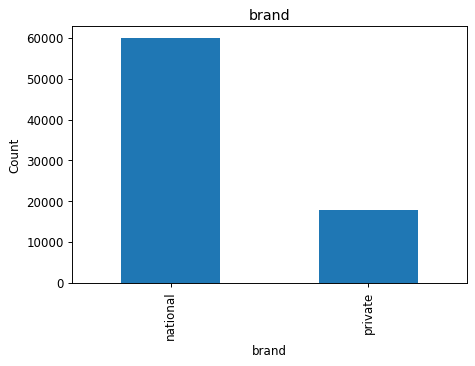

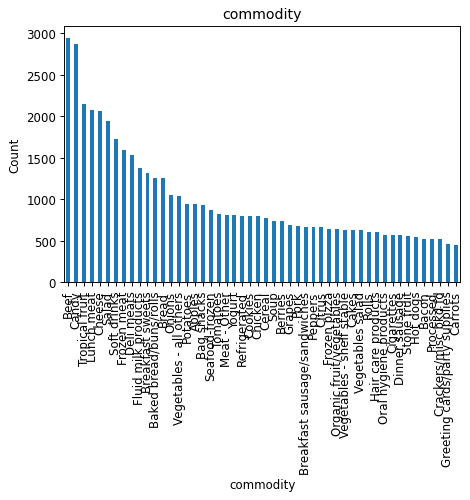

In [77]:
## Lets analyse the continuous values by creating histograms to understand the distribution
for feature in categorical_feature:
    dataset=data.copy()
    plt.figure(dpi=85)
    dataset[feature].value_counts().head(50).plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

#### From the above graph, we can conclude that promiscuous users are more. 
#### Customers with household type 2 adults with kids are more.
#### Customers between age 19 and 24 are more.
#### Customers are buying more from grocery department.
#### Beef is mostly bought by the customers.
#### Customers buying products with national brands more.

In [40]:
data_by_store = data.groupby('department').agg([np.sum, np.median, np.mean])
data_by_store[['price']].T

C:\Users\DHRUPTI PATEL\AppData\Local\Temp\ipykernel_20648\3569290077.py:1: FutureWarning: ['loyalty', 'household_type', 'age_band', 'brand', 'commodity', 'transaction_date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data_by_store = data.groupby('department').agg([np.sum, np.median, np.mean])


department      Cosmetics          Deli       Floral       Grocery  \
price sum     2536.640000  15097.860000  2588.940000  63537.080000   
      median     3.480000      3.690000     5.990000      2.000000   
      mean       5.562807      4.150044     7.504174      2.490088   

department            Meat    Nutrition        Pastry  Pharmaceutical  \
price sum     52443.390000  8810.720000  13759.600000     44686.05000   
      median      3.790000     3.000000      2.000000         2.59000   
      mean        4.825931     3.564207      2.960327         3.83703   

department         Produce    Salad Bar      Seafood  
price sum     37251.240000  1580.440000  8922.920000  
      median      1.990000     2.590000     4.850000  
      mean        2.301733     3.265372     5.972503

In [41]:
data_by_brand = data.groupby('brand').agg([np.sum, np.median, np.mean])
data_by_brand[['price']].T

C:\Users\DHRUPTI PATEL\AppData\Local\Temp\ipykernel_20648\3209384274.py:1: FutureWarning: ['loyalty', 'household_type', 'age_band', 'department', 'commodity', 'transaction_date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data_by_brand = data.groupby('brand').agg([np.sum, np.median, np.mean])


brand              national       private
price sum     201482.760000  49732.120000
      median       2.500000      2.000000
      mean         3.364551      2.783618

In [42]:
data_by_loy = data.groupby('loyalty').agg([np.sum, np.median, np.mean])
data_by_loy[['price']].T

C:\Users\DHRUPTI PATEL\AppData\Local\Temp\ipykernel_20648\1344705863.py:1: FutureWarning: ['household_type', 'age_band', 'department', 'brand', 'commodity', 'transaction_date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data_by_loy = data.groupby('loyalty').agg([np.sum, np.median, np.mean])


loyalty       First Time Buyer       Loyalist    Promiscuous
price sum          3524.530000  102324.800000  145365.550000
      median          2.490000       2.500000       2.500000
      mean            3.108051       3.230663       3.234443

In [43]:
data_by_age = data.groupby('age_band').agg([np.sum, np.median, np.mean])
data_by_age[['price']].T

C:\Users\DHRUPTI PATEL\AppData\Local\Temp\ipykernel_20648\1479666202.py:1: FutureWarning: ['loyalty', 'household_type', 'department', 'brand', 'commodity', 'transaction_date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data_by_age = data.groupby('age_band').agg([np.sum, np.median, np.mean])


age_band              19-24         25-34         35-44         45-54  \
price sum     129514.460000  41374.530000  15307.180000  64142.330000   
      median       2.500000      2.500000      2.490000      2.500000   
      mean         3.265784      3.208074      3.167221      3.194816   

age_band           55-64  Greater than 65  
price sum     450.640000        425.74000  
      median    2.500000          2.49000  
      mean      3.265507          2.89619

In [44]:
data.corr()

,customer_id,product_id,basket_id,store,price,days_since_first,day,month,year
customer_id,1.000000,0.003767,0.994600,NaN,0.017833,-0.033922,0.108246,-0.084574,0.017203
product_id,0.003767,1.000000,0.002913,NaN,0.108969,-0.013682,0.002473,-0.008893,-0.005943
basket_id,0.994600,0.002913,1.000000,NaN,0.017384,0.001154,0.082977,-0.057037,0.011795
store,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,0.017833,0.108969,0.017384,NaN,1.000000,-0.009132,0.009954,-0.022957,0.009413
days_since_first,-0.033922,-0.013682,0.001154,NaN,-0.009132,1.000000,-0.017289,0.192046,-0.051317
day,0.108246,0.002473,0.082977,NaN,0.009954,-0.017289,1.000000,-0.850770,0.177781
month,-0.084574,-0.008893,-0.057037,NaN,-0.022957,0.192046,-0.850770,1.000000,-0.214304
year,0.017203,-0.005943,0.011795,NaN,0.009413,-0.051317,0.177781,-0.214304,1.000000


<AxesSubplot:>

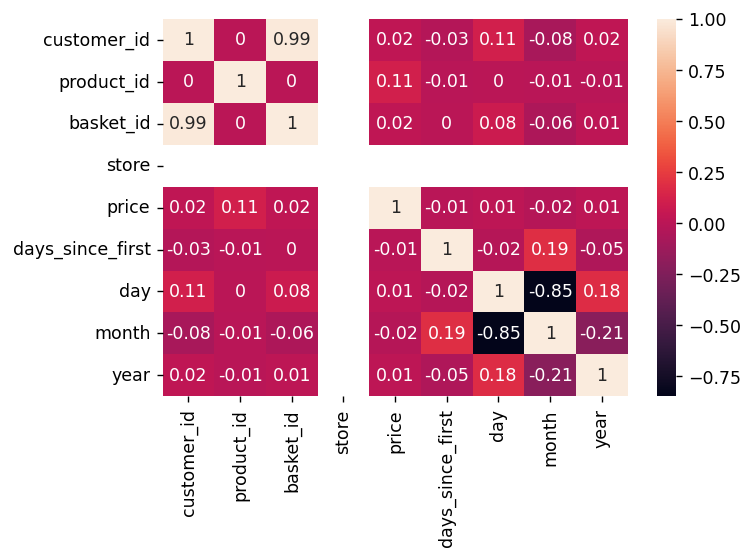

In [45]:
plt.figure(dpi=125)
sns.heatmap(np.round(data.corr(),2),annot=True)

### we can see that there is no such high correlation between features.

## Bivariate analysis

Text(0.5, 1.0, 'Loyalty ')

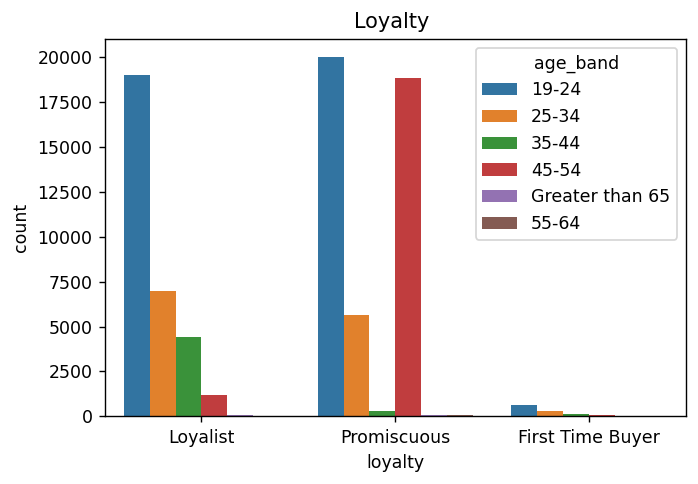

In [46]:
plt.figure(dpi=125)
sns.countplot(x = "loyalty",  hue = "age_band", data =data).set_title('Loyalty ')

#### From the above graph, loyalist customers are between the age 19 and 24. Promiscous customers are between the age 19 and 24, and 45 and 54.

Text(0.5, 1.0, 'Loyalty ')

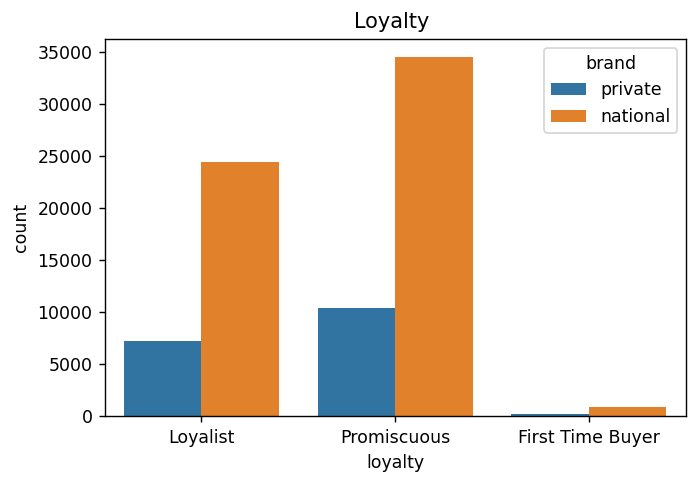

In [47]:
plt.figure(dpi=125)
sns.countplot(x = "loyalty",  hue = "brand", data =data).set_title('Loyalty ')

Text(0.5, 1.0, 'Loyalty ')

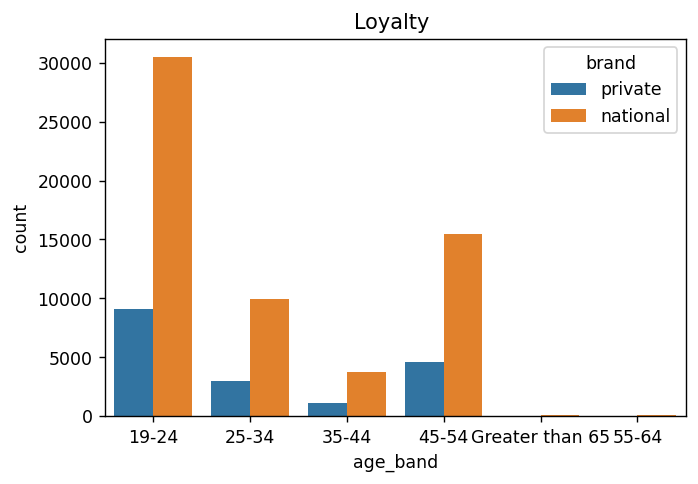

In [48]:
plt.figure(dpi=125)
sns.countplot(x = "age_band",  hue = "brand", data =data).set_title('Loyalty ')

#### From the both graphs we can clearly see that all types of customers are buying products with national brands.

<AxesSubplot:xlabel='commodity', ylabel='price'>

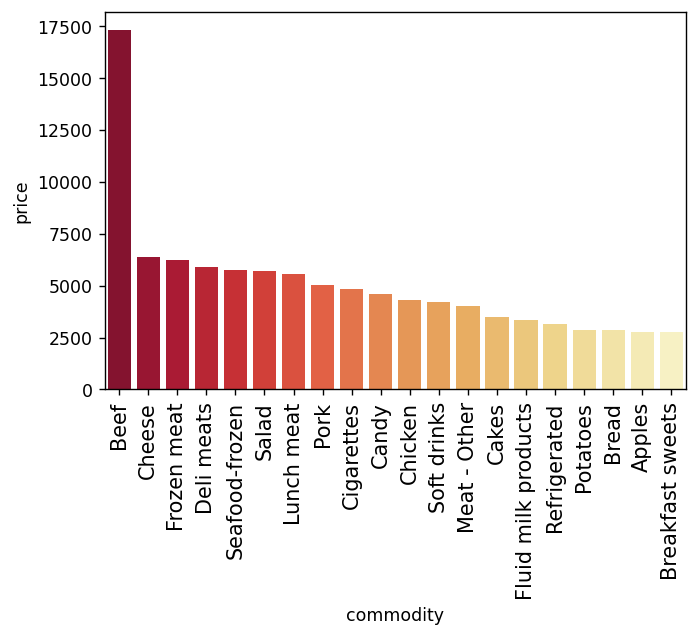

In [49]:
plt.figure(dpi=125)
plt.xticks(rotation=90,fontsize=12)
sns.barplot(y='price', x='commodity', data=data.groupby(['commodity'])['price'].sum().sort_values(ascending=False).reset_index().head(20),palette='YlOrRd_r',order=list(data.groupby(['commodity'])['price'].sum().sort_values(ascending=False).reset_index().head(20)['commodity']))

#### From the above graph, These are the top 20 products mostly bought by the customers. Among them, beef is the common product bought by the customers.

Text(0.5, 1.0, 'Loyalty ')

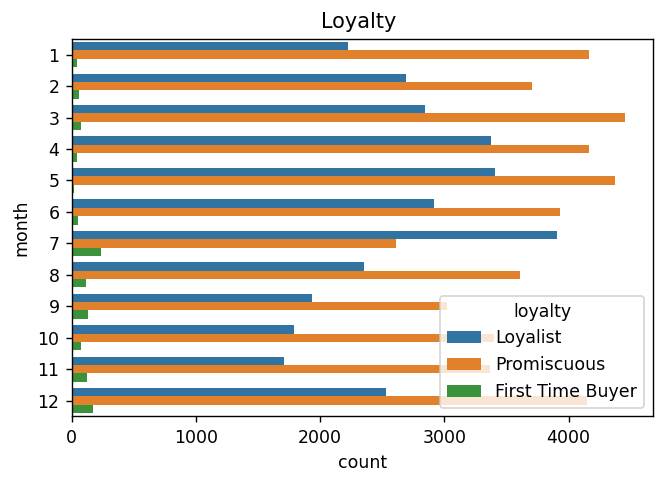

In [50]:
plt.figure(dpi=125)
sns.countplot(y = "month",  hue = "loyalty", data =data).set_title('Loyalty ')

Text(0.5, 1.0, 'Loyalty ')

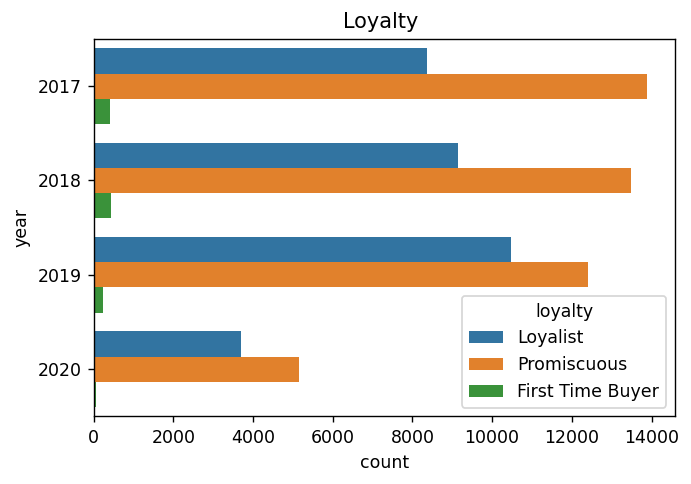

In [51]:
plt.figure(dpi=125)
sns.countplot(y = "year",  hue = "loyalty", data =data).set_title('Loyalty ')

#### From the first graph, promiscuous customers are buying more in the month march. Loyalist and first time buyers are buying more in July month.
#### From the second graph, promiscuous customers bought more in the year 2017. The first time buyers bought more in the year 2017 and 2018. That concludes, first time buyers are not becoming loyalty customers.


Text(0.5, 1.0, 'Loyalty ')

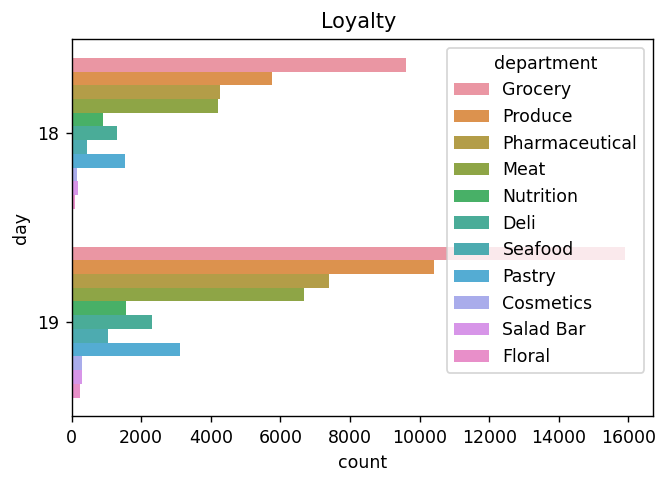

In [52]:
plt.figure(dpi=125)
sns.countplot(y = "day",  hue = "department", data =data).set_title('Loyalty ')

## Time series analysis

In [53]:
data['transaction_date']=pd.to_datetime(data.transaction_date).dt.date
data['t_date'] = pd.to_datetime(data.transaction_date) #convert to date format
data['t_date'] = data.t_date + pd.offsets.MonthBegin(-1) #send dates to first day of the month

In [54]:
ts = data.groupby(['t_date']).agg(total_revenue=('price', sum)).reset_index()

In [55]:
ts

,t_date,total_revenue
0,2017-01-01,5287.93
1,2017-02-01,5738.20
2,2017-03-01,6295.21
3,2017-04-01,5804.32
4,2017-05-01,5461.15
5,2017-06-01,7206.28
6,2017-07-01,7107.16
7,2017-08-01,6790.37
8,2017-09-01,5264.79
9,2017-10-01,5369.17


In [56]:
training = ts.loc[ts.t_date < '2020-01-01'].set_index('t_date')

In [57]:
training

,total_revenue
t_date,
2017-01-01,5287.93
2017-02-01,5738.20
2017-03-01,6295.21
2017-04-01,5804.32
2017-05-01,5461.15
2017-06-01,7206.28
2017-07-01,7107.16
2017-08-01,6790.37
2017-09-01,5264.79


In [58]:
training.shape

(36, 1)

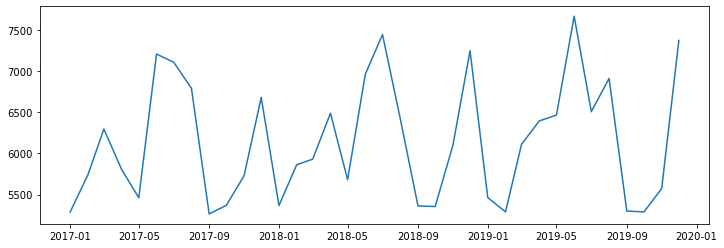

In [59]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(training)   

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

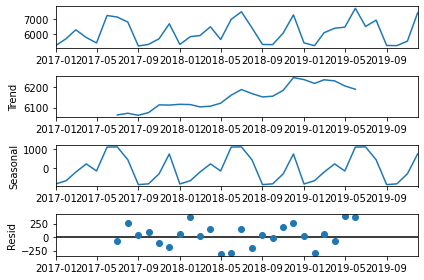

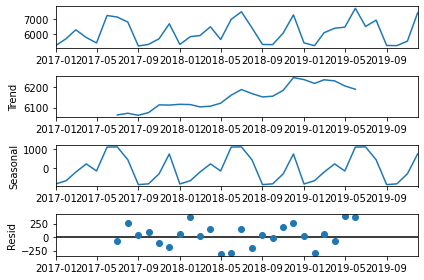

In [61]:
ts_components = seasonal_decompose(training)
ts_components.plot()

#### From the above forecasting, the trend show that revenue is growing after 2017, but after march 2019 it is degrading. 
#### The seasonal shows that it is following monthly cycling pattern.


In [62]:
split = round(len(training) / 2) # Find mid-point
x1 = training[0:split] # Extract first half
x2 = training[split:]  # Extract second half

# Calculate means
mean1= x1.mean()
mean2= x2.mean()
print("Mean 1 & 2 = ", round(mean1[0]), round(mean2[0]))

# Calculate variances
var1=x1.var()
var2=x2.var()
print("Variance 1 & 2 = ",round(var1[0]), round(var2[0]))

Mean 1 & 2 =  6057 6237
Variance 1 & 2 =  435630 690131


In [63]:
from statsmodels.tsa.stattools import adfuller

In [64]:
# Run test:
test_adf = adfuller(training)

#Output the results:
print('ADF test = ', test_adf[0])
print('p-value = ', test_adf[1])

ADF test =  -3.9182236153997114
p-value =  0.001904750392803878


In [65]:
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

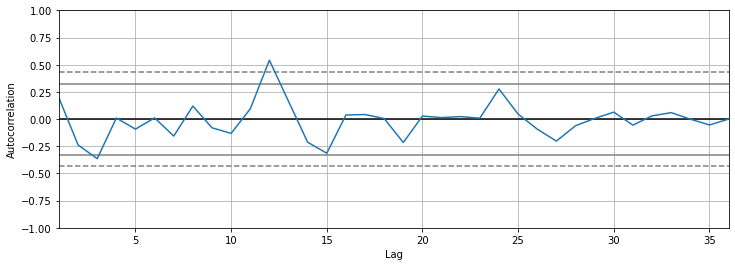

In [66]:
fig, ax = plt.subplots(figsize=(12, 4))
autocorrelation_plot(training)

In [67]:
test = ts.loc[ts.t_date >= '2020-01-01'].set_index('t_date')

# Have a look at our test datset:
print(test)

            total_revenue
t_date                   
2020-01-01        5242.21
2020-02-01        6240.52
2020-03-01        5835.69
2020-04-01        6380.56
2020-05-01        6235.96


In [68]:
#13
# Transform our data in a series, where the index is the time series
whole = ts.set_index('t_date').squeeze().copy()
# history is going to countain our training data as a time series
history = whole.take(range(36))
# future contains the test data, also as a time series
future = test.squeeze().copy()

In [69]:
for t in range(len(future)):
    
    # create our model using our dataset, specify the parameters of the method, p=3, d=0 as our data is stationary, q=0
    # parameter freq is used to define the frequency we have our data on, in this case it's MS or MonthStart
    model = ARIMA(pd.DataFrame(history).asfreq('MS'), order=(3,0,0))
    
    # use the fit method so the model is prepared with the training data
    model_fit = model.fit()
    
    # use the forecast method to compute the predictions, in this case we just want the prediction for the next month
    # change steps value to increase the prediction range
    # Output will return three values:
    # 0 - the list of predicted values with size steps 
    # 1 - the calculated standard error of the prediction
    # 2 - the confidence interval of the prediction given the standard error
    # output = model_fit.forecast(steps=1)
    output = model_fit.get_forecast(steps=1)
    
    # yhat is the value predicted by the model, in this case just one month
    # yhat = output[0].round(2) 
    yhat = output.predicted_mean[0].round(2)
    
    # stderr is the standard error of the prediction:
    # stderr = output[1].round(2) 
    stderr = output.se_mean[0].round(2)
    
    #confint is the confidnece interval given the standard error:
    # confint = output[2].round(2) 
    confint = output.conf_int().to_numpy().round(2)
    
    # obs is the actual value observed for the predicted month, so we will compare predicted value v observed (real) value
    month = future.index[t]
    obs = future[t].round(2)
    
    # print the forecast revenue vs the observed revenue (since Jan 2020)
    print(month)
    print('prediction:', yhat, ', expected:', obs, ', stderr:', stderr, ', conf. int:', confint)
    
    # note that with each run, ARIMA will be run with the last observed value, so we just extend from the original time series
    history = whole.take(range(36 + t+1))
    

2020-01-01 00:00:00
prediction: 6815.5 , expected: 5242.21 , stderr: 646.11 , conf. int: [[5549.16 8081.85]]
2020-02-01 00:00:00
prediction: 5965.19 , expected: 6240.52 , stderr: 683.26 , conf. int: [[4626.02 7304.36]]
2020-03-01 00:00:00
prediction: 5920.43 , expected: 5835.69 , stderr: 675.21 , conf. int: [[4597.03 7243.83]]
2020-04-01 00:00:00
prediction: 6334.89 , expected: 6380.56 , stderr: 680.82 , conf. int: [[5000.51 7669.27]]
2020-05-01 00:00:00
prediction: 6165.63 , expected: 6235.96 , stderr: 658.15 , conf. int: [[4875.67 7455.59]]


In [70]:

model = ARIMA(pd.DataFrame(history).asfreq('MS'), order=(3,0,0), freq='MS')
model_fit = model.fit()
# output = model_fit.forecast(steps=12)
output = model_fit.get_forecast(steps=12)


In [71]:
output.predicted_mean

2020-06-01    6193.645435
2020-07-01    6048.412886
2020-08-01    6086.307597
2020-09-01    6124.701664
2020-10-01    6165.788977
2020-11-01    6151.887096
2020-12-01    6132.802393
2021-01-01    6120.980540
2021-02-01    6127.127049
2021-03-01    6135.218480
2021-04-01    6138.506034
2021-05-01    6135.679294
Freq: MS, Name: predicted_mean, dtype: float64

In [72]:
# Confidence intervals:
output.conf_int().round(2)

,lower total_revenue,upper total_revenue
2020-06-01,4919.25,7468.04
2020-07-01,4769.54,7327.29
2020-08-01,4793.66,7378.96
2020-09-01,4766.74,7482.66
2020-10-01,4807.30,7524.28
2020-11-01,4788.29,7515.48
2020-12-01,4761.93,7503.67
2021-01-01,4750.10,7491.86
2021-02-01,4755.07,7499.19
2021-03-01,4762.32,7508.12


In [73]:
# Calculating the 6month Moving Average 
history_tail = pd.DataFrame(history).rolling(window=6) 
moving_avg = history_tail.mean()
# print(moving_avg.head(41))

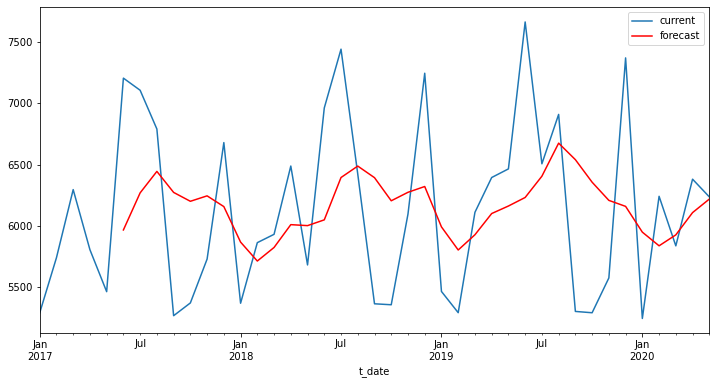

In [74]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))

pd.DataFrame(history).plot(ax=ax);
moving_avg.plot(color = 'red', ax=ax)
plt.legend(['current','forecast'])
plt.show();

#### The above graph of ARIMA model depicts the revenue has no significant increment and it is not even fitting to the actual values. 